# **BigMart Sales Prediction💰**




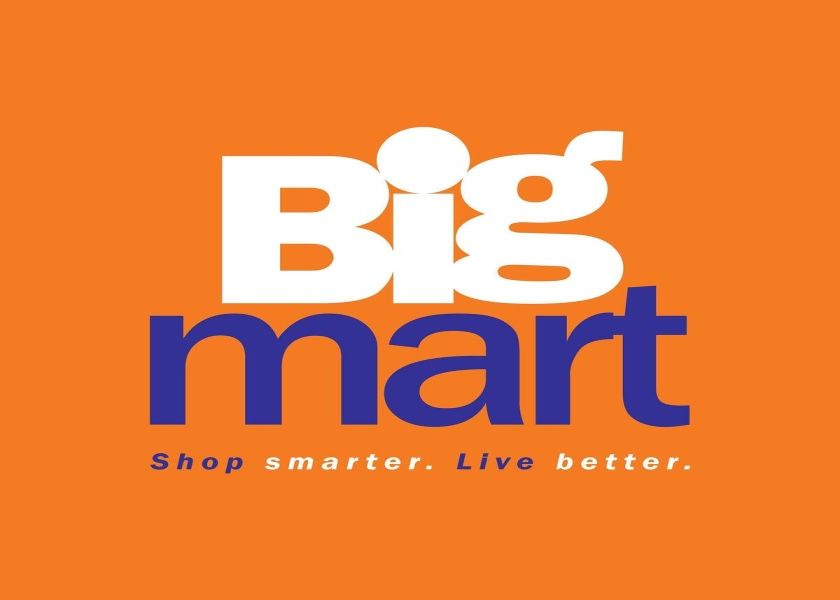

# **Table of Contents**

## 1. **Introduction**
## 2. **Data Id**
## 3. **Libraries**
## 4. **Preprocessing**
## 5. **Data Analysis**
## 6. **Regression models**
## 7. **Conclusion**

# **Introduction**
# **Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.


# **Breakdown of the Problem Statement**

* Supervised Machine Learning Problem.
* The Target Value is Item_Outlet_Sales.

# **Goal**

The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales..

# **Data Id**
This dataset is named **BigMart Sales**. The dataset contains a set of **8,523 records under 12 attributes**:

Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

# **Libraries** 📚

In [87]:

import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline


#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
import math


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Cross Validation
from sklearn.model_selection import cross_val_score as CVS
#Random search cv
from sklearn.model_selection import RandomizedSearchCV

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# **Preprocessing**

In [2]:
df=pd.read_csv('Train.csv')


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing values 🚫

There are many ways data can end up with missing values.
For example:

1. The product wasn't weighed.
2. The data provider didn't include the outlet size of some products.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

In [7]:
print(df.isnull().sum().sort_values(ascending=False),"\n\n",
      df.isnull().sum().sort_values(ascending=False)/df.shape[0] *100,"\n\n")

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 




## Handling Missing Values

### Mean --> average

Text(0.5, 1.0, 'Item Weight Distribution')

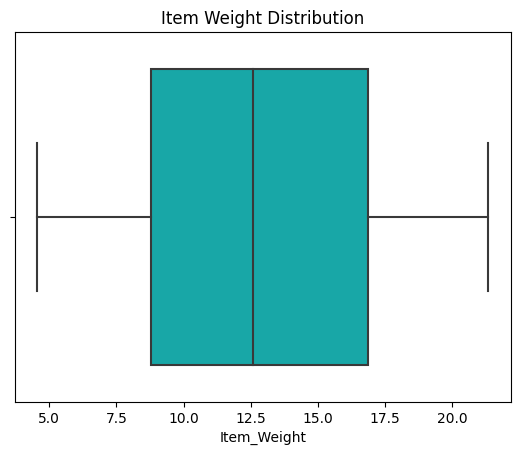

In [8]:
sns.boxplot(x=df['Item_Weight'], color = 'c')
plt.title('Item Weight Distribution')

**There is no outlier. So we can replace with Mean**

In [9]:
df['Item_Weight'].mean()

12.857645184135976

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Mode --> most repeated value

In [12]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [13]:
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x : x.mode()[0])

In [14]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_values = df['Outlet_Size'].isnull()

In [16]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# **DATA ANALYSIS**


In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
# Numericals
num_df = df.select_dtypes('number')
# Categorial
cat_df = df.select_dtypes('object')

In [20]:
# Lets Deal with categorial Data First
for col in cat_df.columns:
  print('\nFrequency of Categories for variable %s'%col)
  print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())


Frequency of Categories for variable Item_Identifier

Total Categories:  1559 
 FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for variable Item_Fat_Content

Total Categories:  5 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type

Total Categories:  16 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood           

**Item_Fat_Content**: We have repeated values ; lets replace them

**Item_Type**: We have categories of items, that can be shrink

In [21]:
 #Replacing repeated values in Item_Fat_Content
 df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Combine Item_Type, as we have 16 categories, but when you see Item_identifier ID, It has first two characters defining the item type, these are FD, DR, NC means food, Drinks, Non-Consumables. lets convert Item_Type into these 3 categories

In [24]:
# Combine Item_Type, and create new category
df['Item_Type_Combined'] = df.Item_Identifier.apply(lambda x:x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable'])
df.Item_Type_Combined.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [25]:
# Lets deal with Numerical Data
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Item_Visibility**: it has min 0 value, which makes no sense

**Outlet_Establishment_Year**: Its better to address how old store is

In [26]:
# Lets consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(df[num_df['Item_Visibility'] == 0]))
miss_values = (df['Item_Visibility'] == 0)
item_vis_avg = df.pivot_table(values='Item_Visibility', index ='Item_Identifier')

df.loc[miss_values, 'Item_Visibility'] = df.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(df['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  526
Missing values after filling:  0


In [27]:
# change Establishment_Year to Outlet_Age
df['Oultet_Age'] = 2013 - df['Outlet_Establishment_Year']

# **Data Visualization**

## **Univariate Analysis**

### **Univariate Plots for Categories**

### **Countplot** for **categorial data**

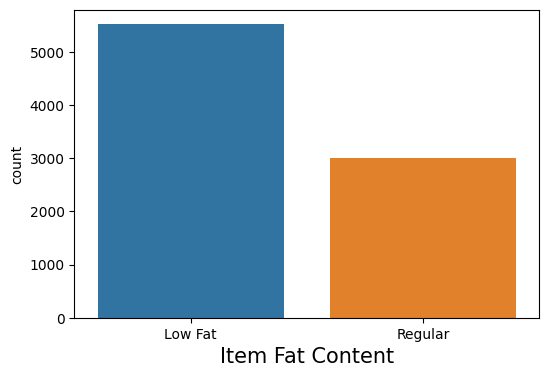

In [28]:
# Categorial Data
#['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type',
#'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

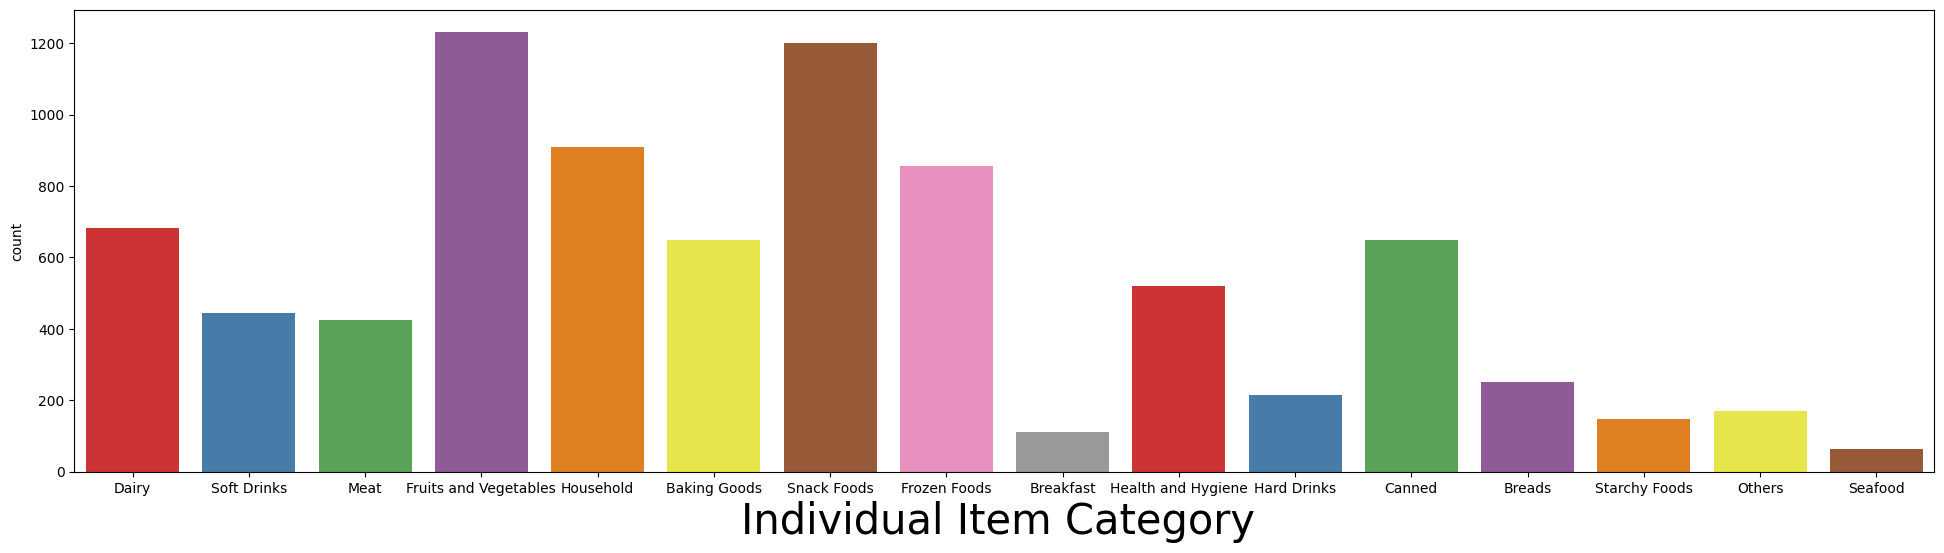

In [29]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='Item_Type', palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

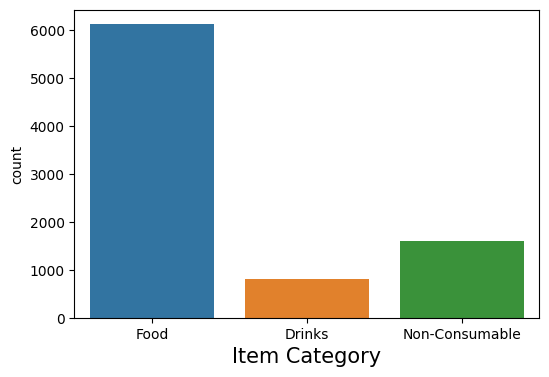

In [30]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

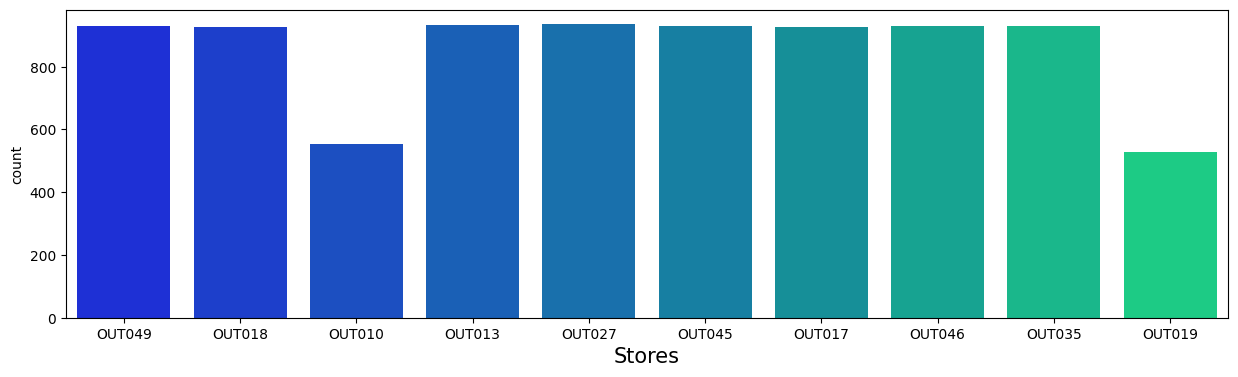

In [31]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

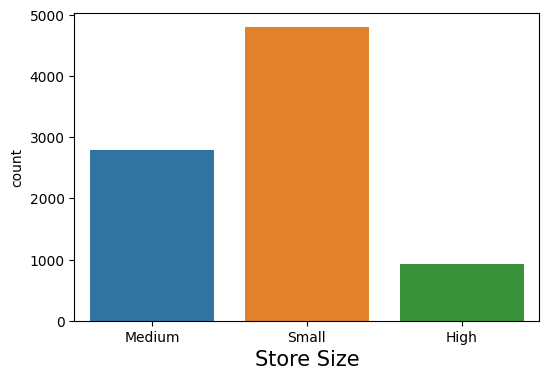

In [32]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

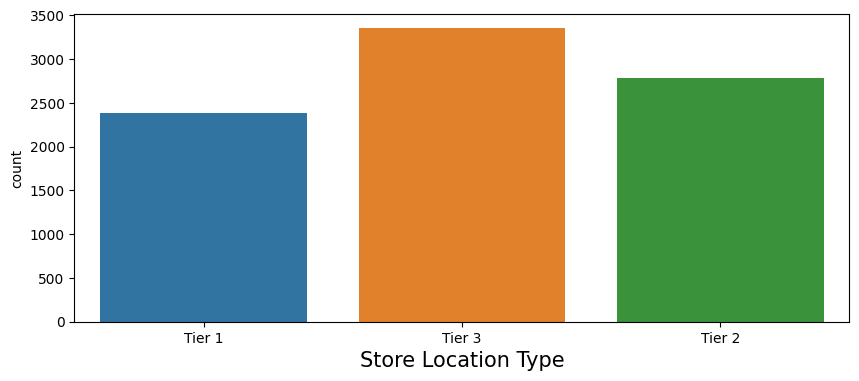

In [33]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

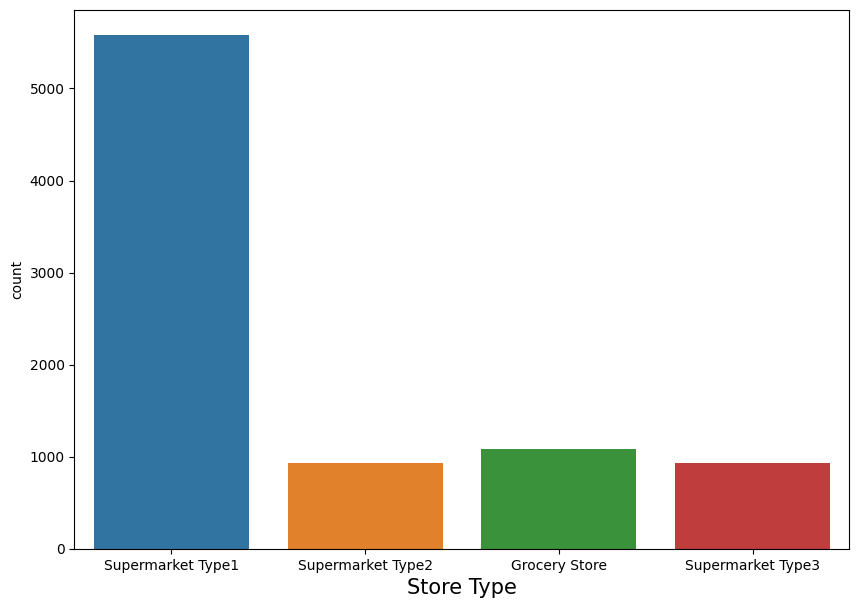

In [34]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

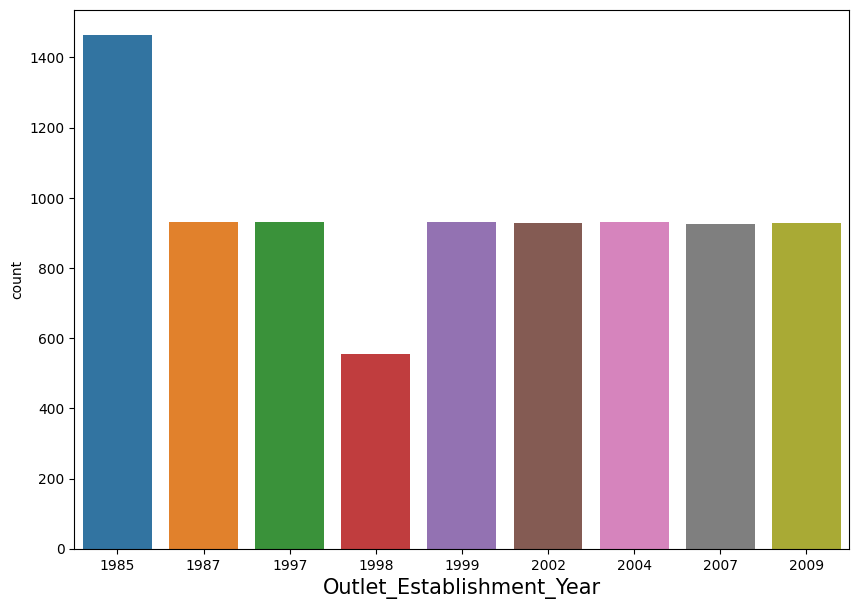

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Outlet_Establishment_Year')
plt.xlabel('Outlet_Establishment_Year', fontsize=15)
plt.show()

**Realizations**

**Item_Fat_Content**: Most Items sold are **low Fat**.

**Item_Type**: Distinctly **fruits & veg**, **snack foods** are popular.

**Item_Type_Combined**: Most Sold Item category is **food**.

**Outlet_Identifier**: Sold items are **distributed evenly** among all stores, **except OUT010 and OUT019.**

**Outlet_Size**: Bigmart Stores are mostly in **small size** in this data.

**Outlet_Location_Type**: Most common type of location is **Tier3**

**Outlet_Type**: By a wide margin Most Store Types are **SuperMarket Type1**.

**Outlet_Establishment_Year** : Most of the outlets were established in the year of **1985** and least in **1998**

### **Univariate Plots for Numerical**
* **Distplot** for **Numerical data**





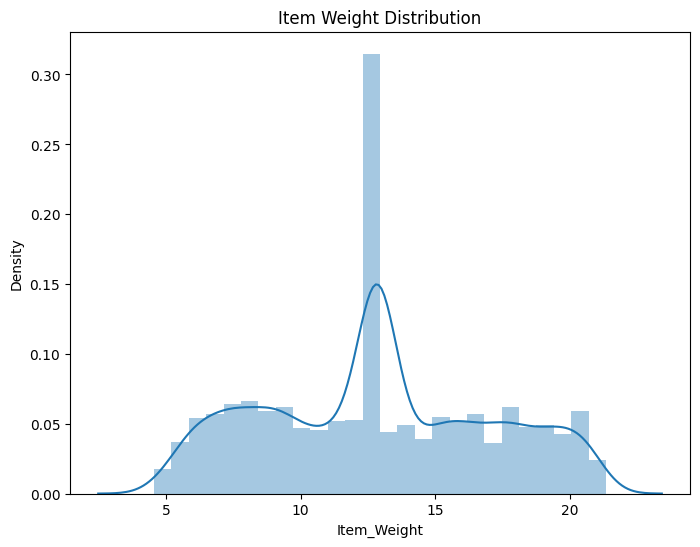

In [36]:
plt.figure(figsize = (8,6))
sns.distplot(df['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()

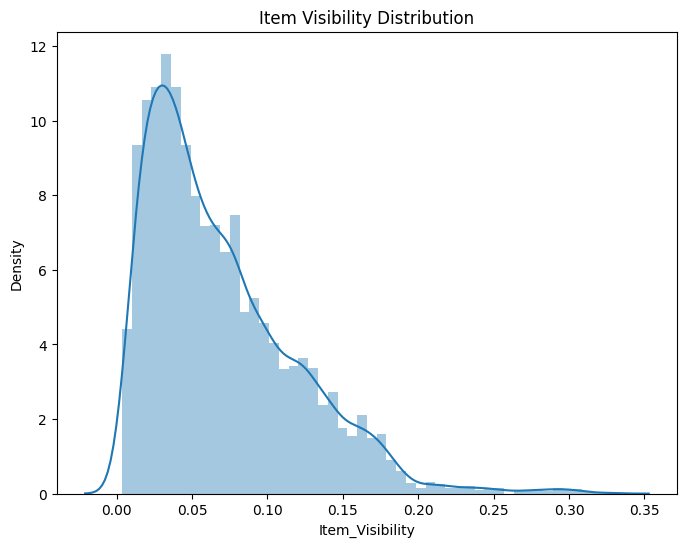

In [37]:
plt.figure(figsize = (8,6))
sns.distplot(df['Item_Visibility'])
plt.title('Item Visibility Distribution')
plt.show()

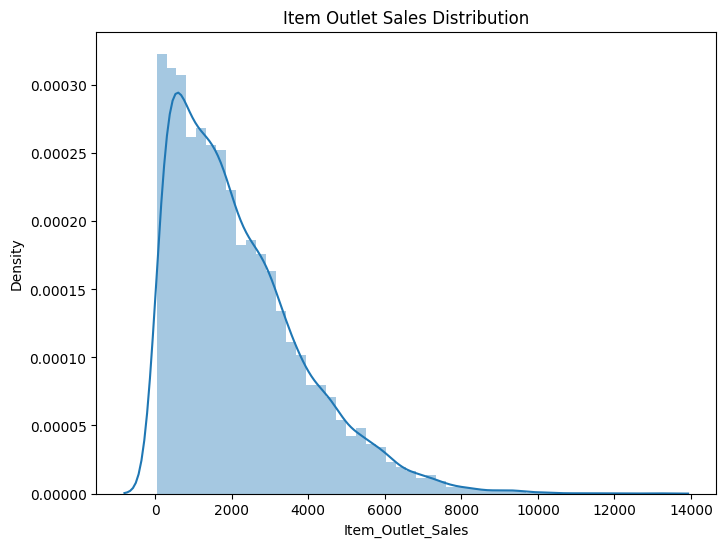

In [38]:
plt.figure(figsize = (8,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.show()

**Realizations**


**Item_Weight**:Item_Weight with range 13 is having the highest distribution.

**Item_Visibility**:The distribution is kind of right skewed or **positive skewed**.

**Item_Outlet_Sales**: Most Outlet sales in range of 1000 to 2000 and its a **right skewed distribution**.

## **Bivariate Analysis**

### **Bivariate plots For Numerical**
Let's check following relationships


*   Sales per Item_MRP
*   Sales per Item_Visibility
*   Sales per Item_Weight








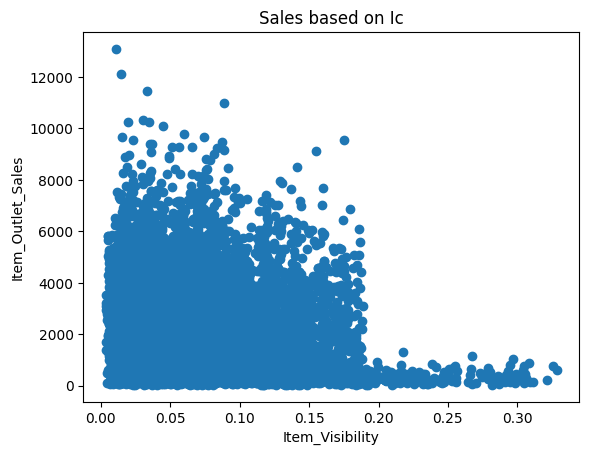

In [39]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.title('Sales based on Ic')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

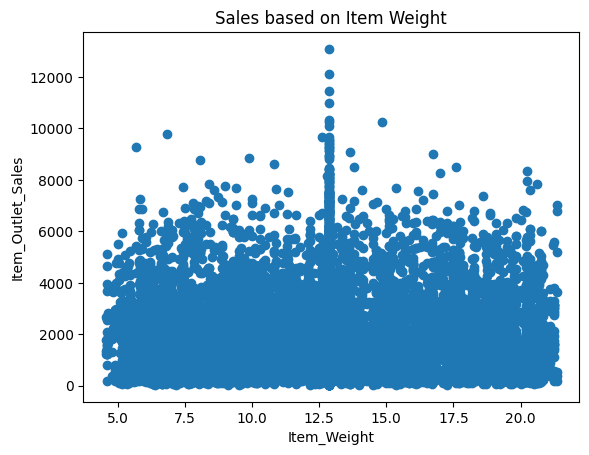

In [40]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

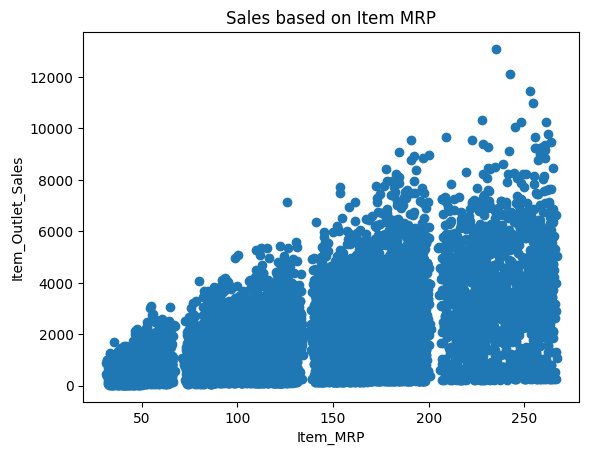

In [41]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

**Realizations**

*   **Item_Visibility**: Looks like it has **negative correlation**.

*   **Item_Weight**: Not a particular Pattern, Data is **very spreaded**.

*   **Item_MRP**: Items with **higher MRP Sales tends to sell better**




###**Bivariate plots For Categorical**

Let's check following relationships


*   Sales per Item_Type_Combined
*   Sales per Outlet_Identifier
*   Sales per Outlet_Type
*   Sales per Outlet_Size
*   Sales per Outlet_Location_Type




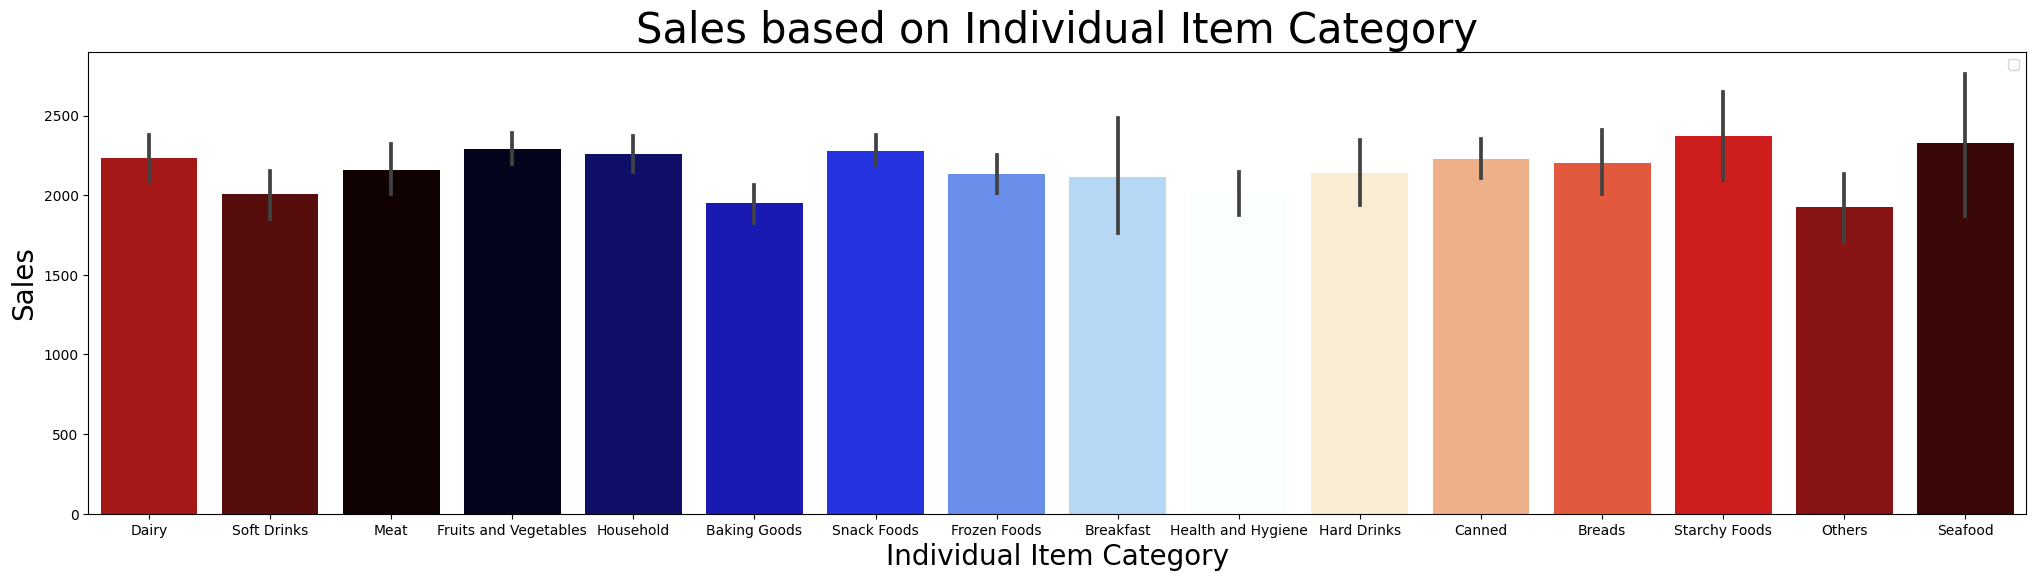

In [42]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=df,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

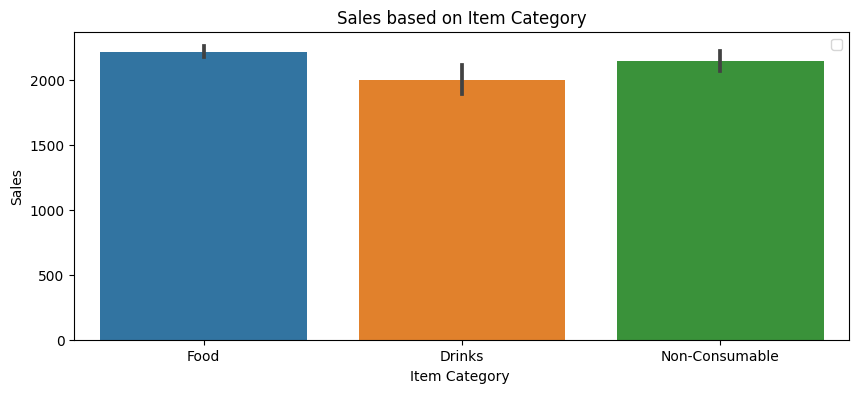

In [43]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

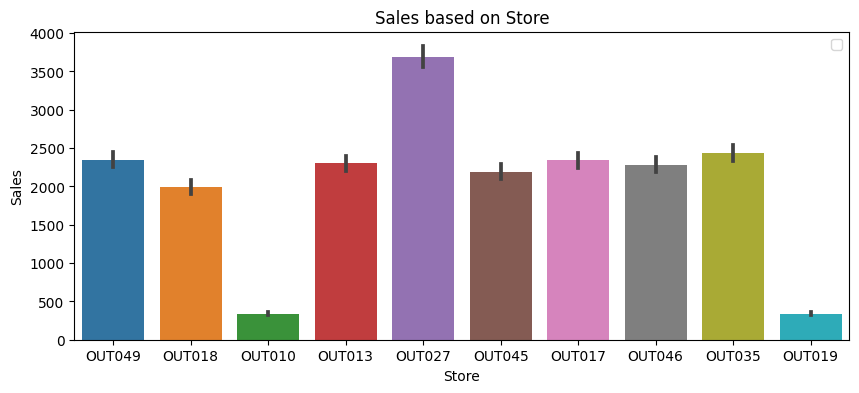

In [44]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

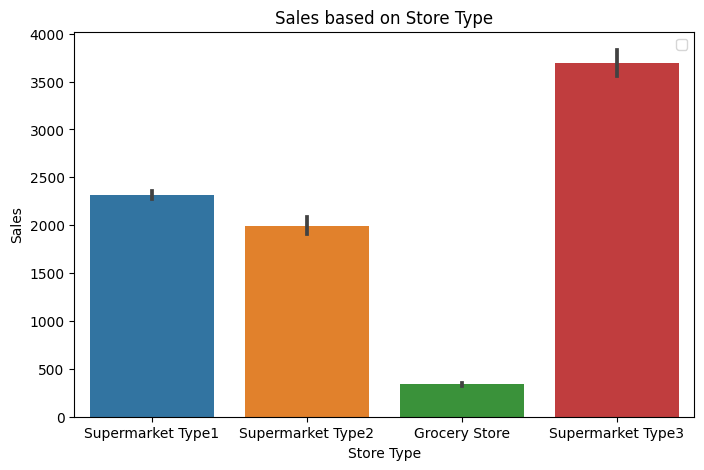

In [45]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

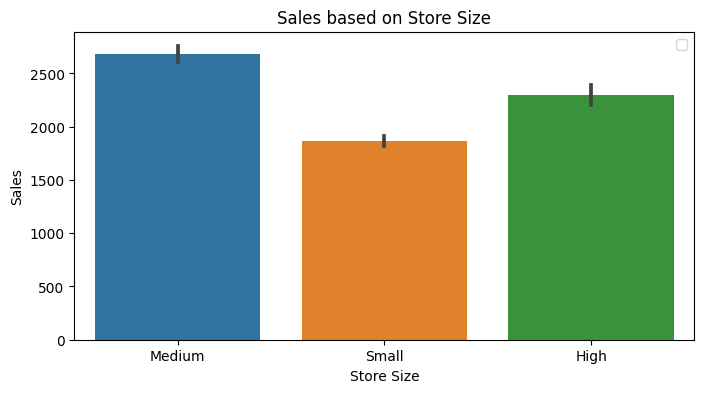

In [46]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

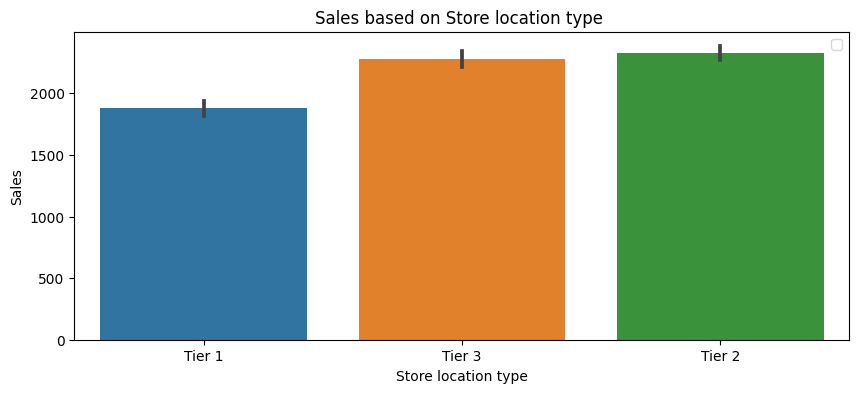

In [47]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Realizations:**

**Item_Type_Combined**: Based on Categories, **Food** has the most Sells, but the difference is very small.

**Outlet_Identifier**: **Outlet027** is the  most profitable, and **Outlet019** and **Outlet010** have **least Sells**.

**Outlet_Type**: Most Sells are through **SuperMarket Type3** . Surprisingly not Type1.

**Outlet_Size**: Sells are mostly **even in Medium and High-stores**.

**Outlet_Location_Type**: Most sales are through Tier3 and Tier2. **Tier2 is slightly higher**.

## **Multivariate Analysis**



**Numerical vs  Numerical**


1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot


**Categorical vs  Numerical**

1. Bar chart
2. Voilin plot
3. Categorical box plot
4. Swarm plot

**Two Categorical Variables**

1. Bar chart
2. Grouped bar chart
3. Point plot

Let's check following data

* Outlet Type in all Outlet location based on sales.

* Sales of Item_Type based on Outlet_Type.

* Outlet_Location_Type of Outlet_Type based on sales.

* Sales of Outlet_Location_Type based on Item_Type_Combined.

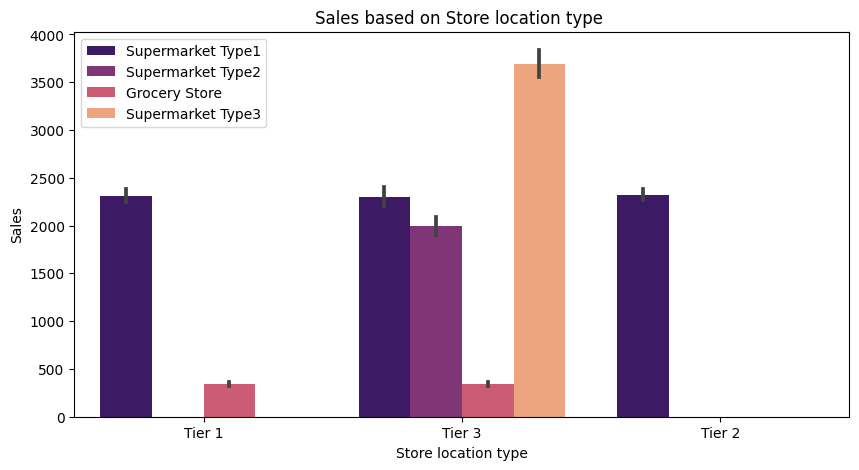

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

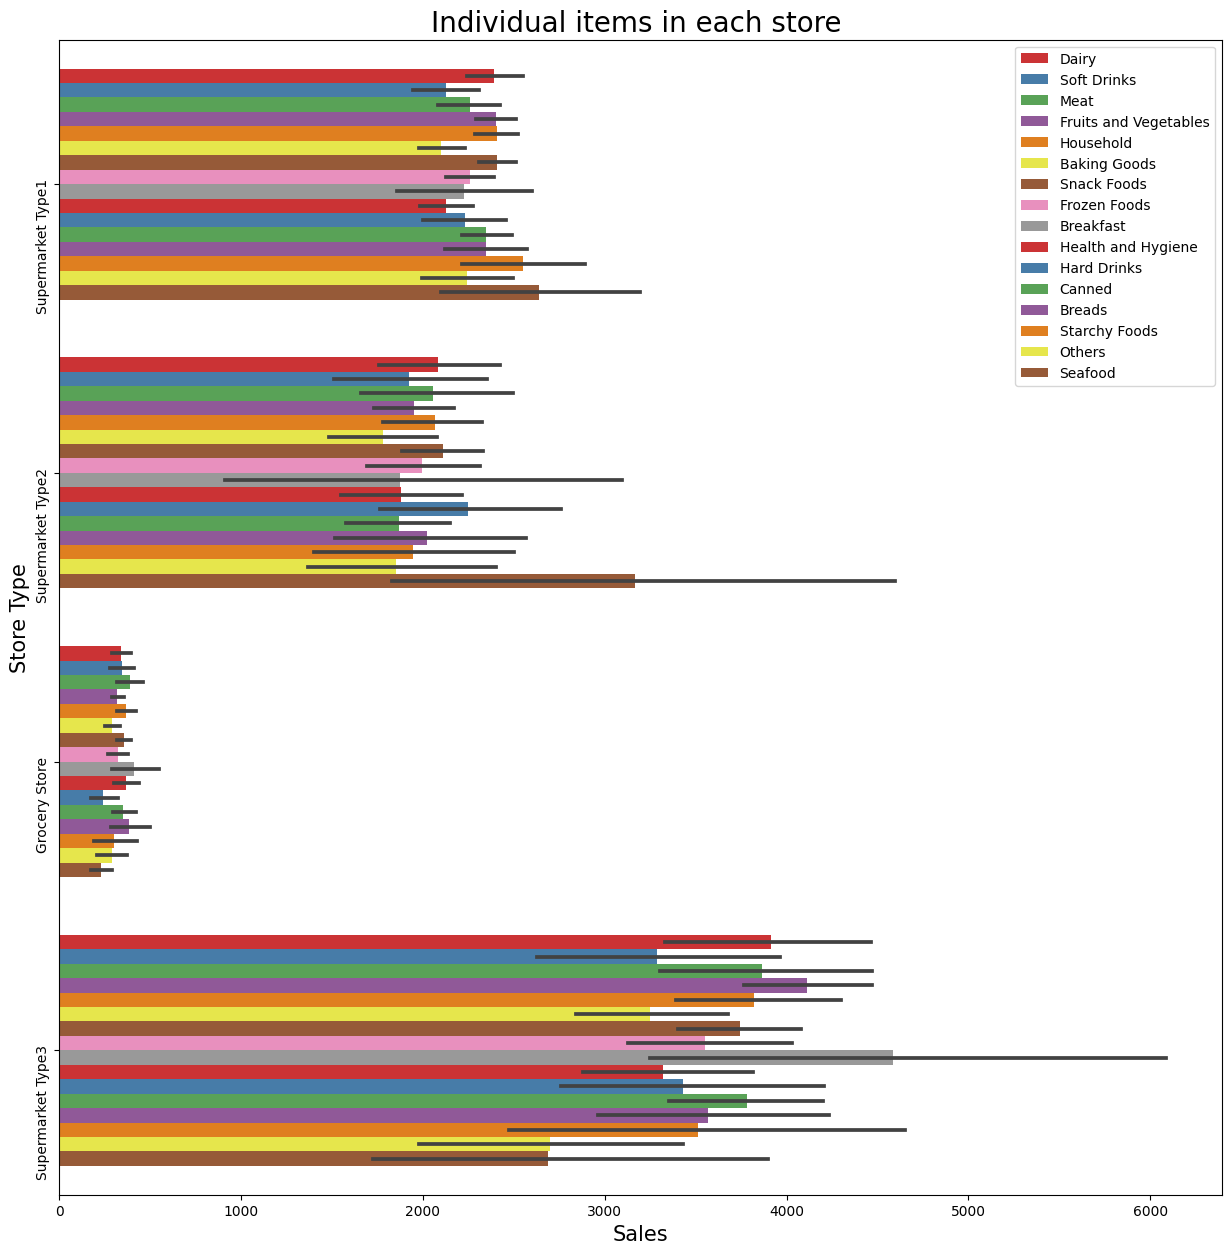

In [49]:
plt.figure(figsize=(15,15))
sns.barplot(data=df,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

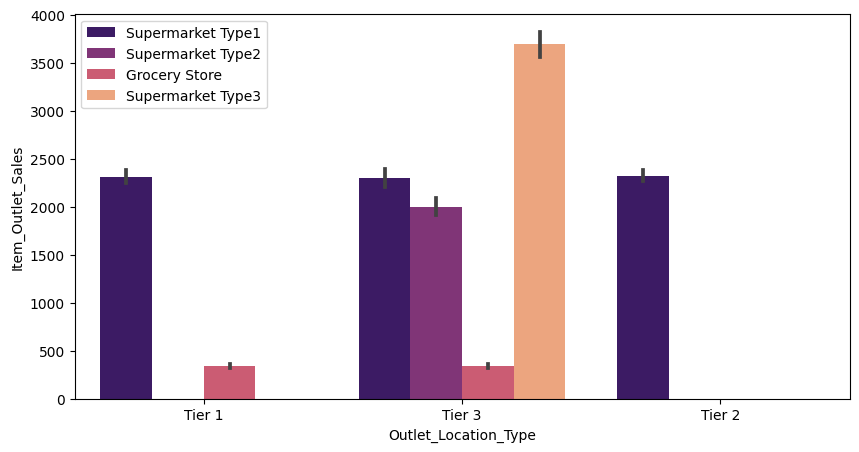

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x ='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.legend()

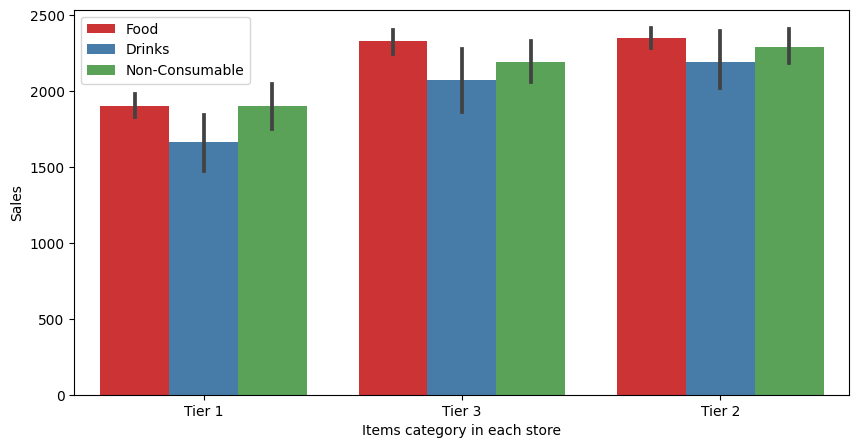

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('Items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

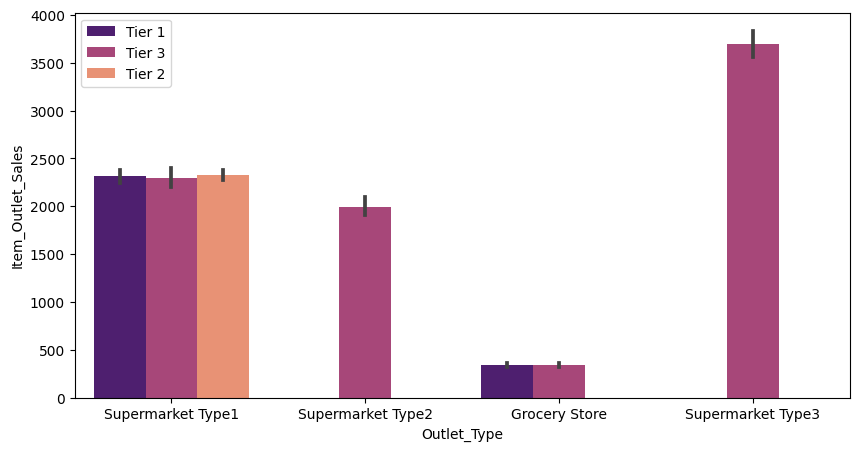

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',palette='magma')
plt.legend()

**Realizations:**

* **Seafood** is the most popular Item_Type sold in **SuperMarket 1 and 2.** Grocery store has the least sales.

* Only Tier 3 has all Outlet_Type, and SuperMarket type3 has the most sales.

* Outlet_Location_Type has almost equal sales based on Item_Type_combined.

# Correlation Matrix

<Axes: >

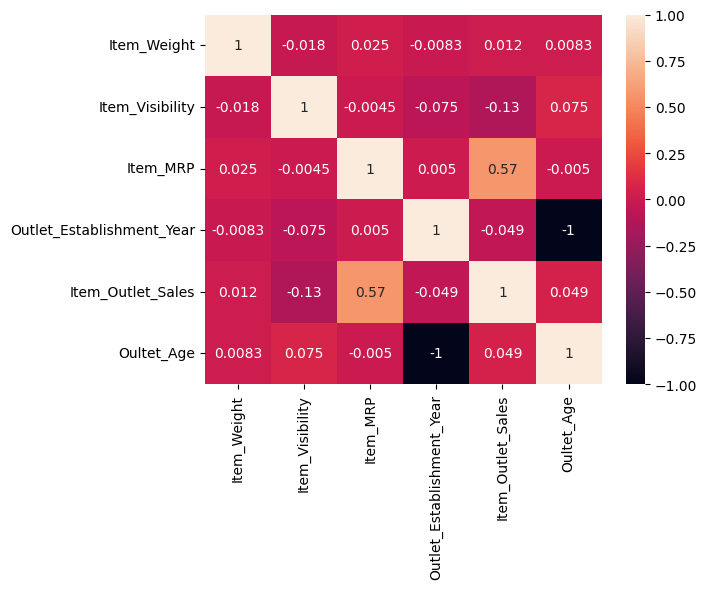

In [53]:
# Correlation Matrix
plt.Figure(figsize=(20,5))
sns.heatmap(df.corr(), annot=True)

* We can see **Item_Outlet_Sales is highly correlated with Item_MRP**


# Feature Engineering


We have 7 categorial columns

**Ordinal Data:**
* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type



**Nominal Data:**

* Item_Identifier
* Item_Type
* Outlet_Identifier
* Outlet_Type


**Numeric values:**

From the numeric variables **Outlet_Establishment_Year** is no longer needed

# **Conclusion:**

In my FE process i have decided:

* The columns **Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values** so we will drop them.

* All **Ordinal variables** will be **Label encoded**.

* The columns **Item_Type** and **Outlet_Type** will be **One Hot encoded**.

* **Item_Visibility** will be **log-transformed** to remove skewness

In [54]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
for i in label:
    df[i] = le.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,Non-Consumable,26


In [55]:
a = pd.get_dummies(df[['Item_Type_Combined','Outlet_Type']])
data_fe = pd.concat([df,a],axis = 1)

In [56]:
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,3735.1380,Food,14,0,1,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,443.4228,Drinks,4,1,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,2097.2700,Food,14,0,1,0,0,1,0,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,...,732.3800,Food,15,0,1,0,1,0,0,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,...,994.7052,Non-Consumable,26,0,0,1,0,1,0,0


In [57]:
data_fe.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined', 'Oultet_Age',
       'Item_Type_Combined_Drinks', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [58]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Item_Type',
                     'Outlet_Establishment_Year','Outlet_Type'], axis=1)
data_fe.head()



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,14,0,1,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,4,1,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,14,0,1,0,0,1,0,0
3,19.20,1,0.015274,182.0950,2,2,732.3800,15,0,1,0,1,0,0,0
4,8.93,0,0.008082,53.8614,0,2,994.7052,26,0,0,1,0,1,0,0


In [59]:
#Removing Skewness
data_fe['Item_Visibility'] = np.log(data_fe['Item_Visibility'])

In [60]:
# Train and Test split
y = data_fe['Item_Outlet_Sales']
X = data_fe.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

### **NUMERICAL FEATURES**

### **Splitting features and Target**

In [61]:
y = data_fe['Item_Outlet_Sales']
X = data_fe.drop('Item_Outlet_Sales', axis=1)
#train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [62]:
X_train.shape

(6818, 14)

In [63]:
X_test.shape

(1705, 14)

# **Cross Validation**


In [64]:
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average score: {round(scores.mean(),4)}')

# **Normalization**

In [65]:
scaler=MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [66]:
X_test_scaled = scaler.transform(X_test)

In [67]:
features = X_train.columns

In [68]:
features

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Oultet_Age',
       'Item_Type_Combined_Drinks', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

# **Regression Models**

* Linear Regression
* Lasso Regressor
* Ridge Regression
* Decision Tree Regressor
* Random Forest Regressor
* XGBoost Regressor
* Support Vector Regressor
* KNN Regressor
* AdaBoost Regressor

# **LINEAR REGRESSION**

In [69]:
# Model
lr_model= LinearRegression()

# Fit
lr_model.fit(X_train_scaled, y_train)

# Predict
y_predict = lr_model.predict(X_test_scaled)

# Score Metrics for Regression:
lr_MAE = np.round(MAE(y_test, y_predict),3)
lr_MSE = MSE(y_test, y_predict)
lr_RMSE = np.round(math.sqrt(lr_MSE),3)
lr_R_2 = np.round(R2(y_test, y_predict),3)
lr_CS  = round( CVS(lr_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {lr_MAE}\n")
print(f" Root Mean Squared Error:{lr_RMSE}\n")
print(f" R^2 Score: {lr_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

 Mean Absolute Error: 822.836

 Root Mean Squared Error:1105.779

 R^2 Score: 0.568

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average score: 0.5605


In [70]:
# vasulization of model's perfomance
coef2 = pd.Series(lr_model.coef_,features).sort_values()
coef2

Oultet_Age                          -2.739327e+02
Outlet_Size                         -2.096125e+02
Outlet_Location_Type                -7.720371e+01
Item_Weight                         -2.175727e+01
Item_Visibility                      2.156339e+01
Item_Fat_Content                     3.158278e+01
Item_MRP                             3.696873e+03
Outlet_Type_Grocery Store            3.783962e+15
Outlet_Type_Supermarket Type2        3.783962e+15
Outlet_Type_Supermarket Type1        3.783962e+15
Outlet_Type_Supermarket Type3        3.783962e+15
Item_Type_Combined_Non-Consumable    9.925372e+15
Item_Type_Combined_Drinks            9.925372e+15
Item_Type_Combined_Food              9.925372e+15
dtype: float64

<Axes: >

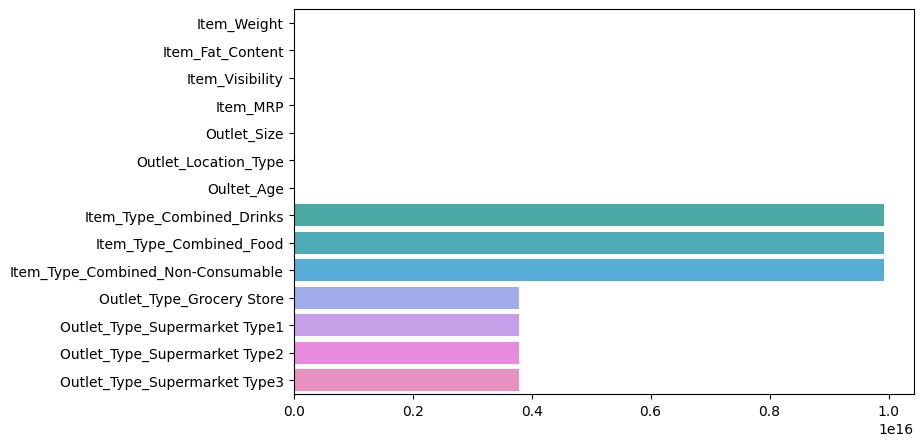

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(x= lr_model.coef_,y=features)

# **LASSO REGRESSION**

In [72]:
 #Model
lasso_model= Lasso(alpha=0.05)

# Fit
lasso_model.fit(X_train_scaled, y_train)

# Predict
y_predict = lasso_model.predict(X_test_scaled)

# Score Metrics for Regression:
lasso_MAE = np.round(MAE(y_test, y_predict),3)
lasso_MSE = MSE(y_test, y_predict)
lasso_RMSE = np.round(math.sqrt(lasso_MSE),3)
lasso_R_2 = np.round(R2(y_test, y_predict),3)
lasso_CS  = round( CVS(lasso_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {lasso_MAE}\n")
print(f" Root Mean Squared Error: {lasso_RMSE}\n")
print(f" R^2 Score: {lasso_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(alpha=0.05),X,y,5)

 Mean Absolute Error: 823.017

 Root Mean Squared Error: 1105.782

 R^2 Score: 0.568

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.57
0.56
Average score: 0.5605


Outlet_Type_Grocery Store           -1878.170160
Outlet_Type_Supermarket Type2        -499.908080
Oultet_Age                           -264.381379
Outlet_Size                          -199.715278
Outlet_Location_Type                  -76.947057
Outlet_Type_Supermarket Type1         -55.268454
Item_Weight                           -22.346184
Item_Type_Combined_Non-Consumable      -4.576659
Item_Type_Combined_Drinks              -0.000000
Item_Visibility                        15.485409
Item_Fat_Content                       31.548131
Item_Type_Combined_Food                33.342785
Outlet_Type_Supermarket Type3        1492.367718
Item_MRP                             3693.123231
dtype: float64


<Axes: >

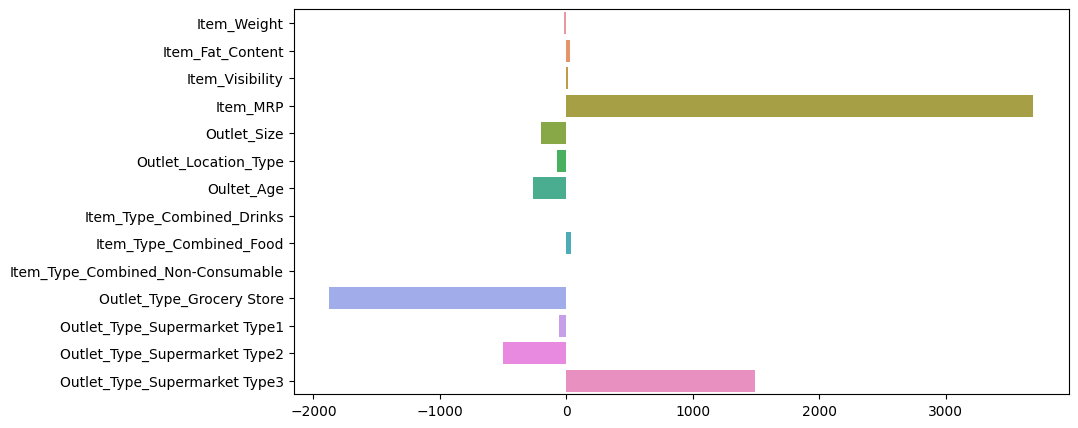

In [73]:
Lasso_coef = pd.Series(lasso_model.coef_, features).sort_values()
print(Lasso_coef)
plt.figure(figsize=(10,5))
sns.barplot(x=lasso_model.coef_, y=features)

# **RIDGE REGRESSION**

In [74]:
 #Model
ridge_model= Ridge()

# Fit
ridge_model.fit(X_train_scaled, y_train)

# Predict
y_predict = ridge_model.predict(X_test_scaled)

# Score Metrics for Regression:
ridge_MAE = np.round(MAE(y_test, y_predict),3)
ridge_MSE = MSE(y_test, y_predict)
ridge_RMSE = np.round(math.sqrt(ridge_MSE),3)
ridge_R_2 = np.round(R2(y_test, y_predict),3)
ridge_CS  = round( CVS(ridge_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {ridge_MAE}\n")
print(f" Root Mean Squared Error: {ridge_RMSE}\n")
print(f" R^2 Score: {ridge_R_2}\n")

# Cross Validation Score check
cross_val(Ridge(),X,y,5)

 Mean Absolute Error: 822.996

 Root Mean Squared Error: 1105.747

 R^2 Score: 0.568

Ridge() Scores:
0.57
0.55
0.55
0.57
0.56
Average score: 0.5605


Outlet_Type_Grocery Store           -1639.854127
Oultet_Age                           -266.759514
Outlet_Type_Supermarket Type2        -266.356268
Outlet_Size                          -202.681940
Outlet_Location_Type                  -77.318235
Item_Weight                           -22.973085
Item_Type_Combined_Non-Consumable     -14.225568
Item_Type_Combined_Drinks              -9.737503
Item_Visibility                        16.232377
Item_Type_Combined_Food                23.963071
Item_Fat_Content                       31.641260
Outlet_Type_Supermarket Type1         179.768186
Outlet_Type_Supermarket Type3        1726.442208
Item_MRP                             3685.993681
dtype: float64


<Axes: >

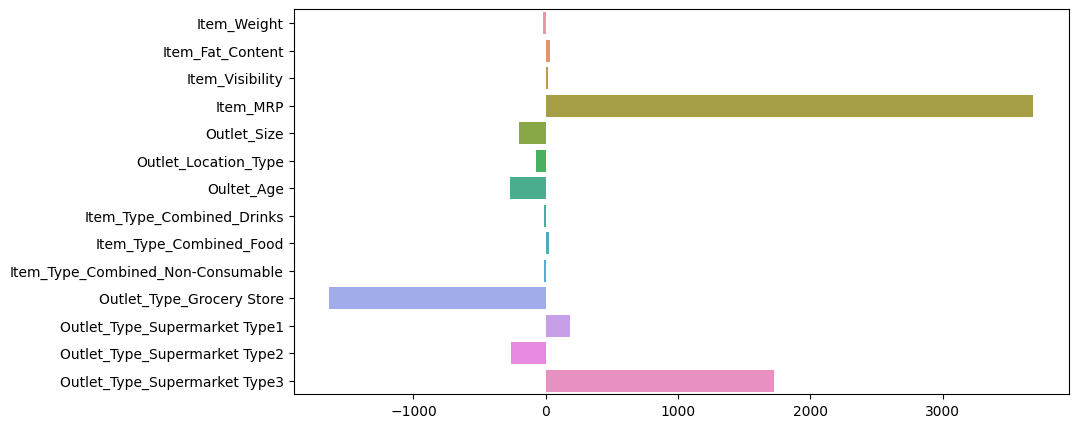

In [75]:
ridge_coef = pd.Series(ridge_model.coef_, features).sort_values()
print(ridge_coef)
plt.figure(figsize=(10,5))
sns.barplot(x=ridge_model.coef_, y=features)

# **Decision Tree Regressor**

In [76]:
 #Model
dt_model= DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# Fit
dt_model.fit(X_train_scaled, y_train)

# Predict
y_predict = dt_model.predict(X_test_scaled)

# Score Metrics for Regression:
dt_MAE = np.round(MAE(y_test, y_predict),3)
dt_MSE = MSE(y_test, y_predict)
dt_RMSE = np.round(math.sqrt(dt_MSE),3)
dt_R_2 = np.round(R2(y_test, y_predict),3)
dt_CS  = round( CVS(dt_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {dt_MAE}\n")
print(f" Root Mean Squared Error: {dt_RMSE}\n")
print(f" R^2 Score: {dt_R_2}\n")

# Cross Validation Score check
cross_val(DecisionTreeRegressor(max_depth=15, min_samples_leaf=100),X,y,5)

 Mean Absolute Error: 754.467

 Root Mean Squared Error: 1073.335

 R^2 Score: 0.593

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) Scores:
0.6
0.57
0.56
0.6
0.6
Average score: 0.5859


Item_MRP                             0.551484
Outlet_Type_Grocery Store            0.319339
Outlet_Type_Supermarket Type3        0.115935
Outlet_Type_Supermarket Type1        0.004483
Item_Weight                          0.002647
Oultet_Age                           0.002501
Item_Visibility                      0.001776
Outlet_Location_Type                 0.000977
Item_Fat_Content                     0.000858
Outlet_Size                          0.000000
Item_Type_Combined_Drinks            0.000000
Item_Type_Combined_Food              0.000000
Item_Type_Combined_Non-Consumable    0.000000
Outlet_Type_Supermarket Type2        0.000000
dtype: float64


<Axes: >

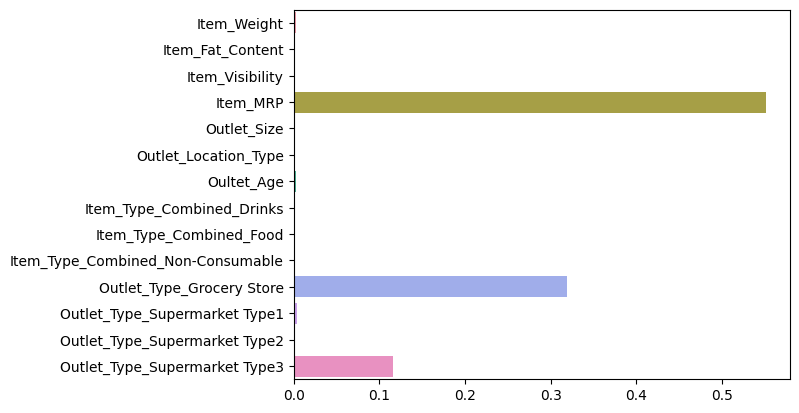

In [77]:
dt_coef = pd.Series(dt_model.feature_importances_, features).sort_values(ascending=False)
print(dt_coef)
sns.barplot(x=dt_model.feature_importances_, y=features)

# **Random Forest Regressor**

In [78]:
#Model
rf_model= RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)
# Fit
rf_model.fit(X_train_scaled, y_train)

# Predict
y_predict = rf_model.predict(X_test_scaled)

# Score Metrics for Regression:
rf_MAE = np.round(MAE(y_test, y_predict),3)
rf_MSE = MSE(y_test, y_predict)
rf_RMSE = np.round(math.sqrt(rf_MSE),3)
rf_R_2 = np.round(R2(y_test, y_predict),3)
rf_CS  = round( CVS(rf_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {rf_MAE}\n")
print(f" Root Mean Squared Error: {rf_RMSE}\n")
print(f" R^2 Score: {rf_R_2}\n")

# Cross Validation Score check
cross_val(RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101),X,y,5)

 Mean Absolute Error: 748.639

 Root Mean Squared Error: 1064.279

 R^2 Score: 0.6

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4, random_state=101) Scores:
0.6
0.58
0.57
0.61
0.6
Average score: 0.5923


Item_MRP                             0.552714
Outlet_Type_Grocery Store            0.321804
Outlet_Type_Supermarket Type3        0.065907
Oultet_Age                           0.054161
Item_Weight                          0.002543
Outlet_Location_Type                 0.001336
Item_Visibility                      0.000946
Outlet_Size                          0.000247
Item_Type_Combined_Food              0.000135
Item_Fat_Content                     0.000108
Outlet_Type_Supermarket Type1        0.000047
Item_Type_Combined_Non-Consumable    0.000028
Outlet_Type_Supermarket Type2        0.000023
Item_Type_Combined_Drinks            0.000000
dtype: float64


<Axes: >

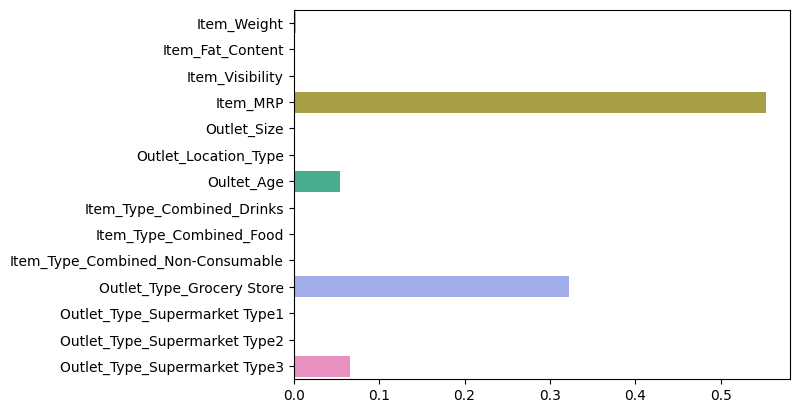

In [79]:
RF_coef = pd.Series(rf_model.feature_importances_, features).sort_values(ascending=False)
print(RF_coef)
sns.barplot(x=rf_model.feature_importances_, y=features)

# **XGBoost**

In [80]:
#Model
xg_model=XGBRegressor()
# Fit
xg_model.fit(X_train_scaled, y_train)

# Predict
y_predict = xg_model.predict(X_test_scaled)

# Score Metrics for Regression:
xg_MAE = np.round(MAE(y_test, y_predict),3)
xg_MSE = MSE(y_test, y_predict)
xg_RMSE = np.round(math.sqrt(xg_MSE),3)
xg_R_2 = np.round(R2(y_test, y_predict),3)
xg_CS  = round( CVS(xg_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {xg_MAE}\n")
print(f" Root Mean Squared Error: {xg_RMSE}\n")
print(f" R^2 Score: {xg_R_2}\n")

# Cross Validation Score check
cross_val(XGBRegressor(),X,y,5)

 Mean Absolute Error: 794.46

 Root Mean Squared Error: 1133.92

 R^2 Score: 0.546

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.55
0.5
0.49
0.53
0.54
Average score: 0.5226


Outlet_Type_Grocery Store            0.817928
Item_MRP                             0.048570
Oultet_Age                           0.047624
Item_Type_Combined_Non-Consumable    0.012747
Outlet_Type_Supermarket Type3        0.010332
Item_Visibility                      0.009279
Item_Type_Combined_Food              0.008677
Item_Type_Combined_Drinks            0.008359
Outlet_Type_Supermarket Type1        0.008286
Outlet_Size                          0.008129
Outlet_Location_Type                 0.007552
Item_Weight                          0.006839
Item_Fat_Content                     0.005678
Outlet_Type_Supermarket Type2        0.000000
dtype: float32


<Axes: >

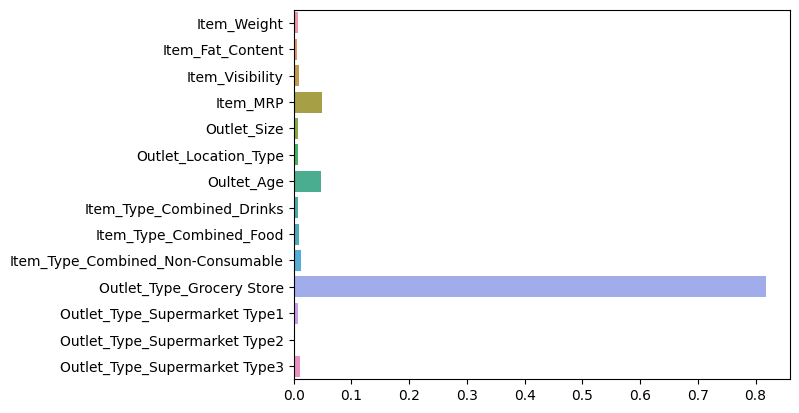

In [81]:
xg_coef = pd.Series(xg_model.feature_importances_, features).sort_values(ascending=False)
print(xg_coef)
sns.barplot(x=xg_model.feature_importances_, y=features)

# **Support Vector Regressor (SVR)**

In [82]:
#Model
svr_model=SVR()
# Fit
svr_model.fit(X_train_scaled, y_train)

# Predict
y_predict = svr_model.predict(X_test_scaled)

# Score Metrics for Regression:
svr_MAE = np.round(MAE(y_test, y_predict),3)
svr_MSE = MSE(y_test, y_predict)
svr_RMSE = np.round(math.sqrt(svr_MSE),3)
svr_R_2 = np.round(R2(y_test, y_predict),3)
svr_CS  = round( CVS(svr_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {svr_MAE}\n")
print(f" Root Mean Squared Error: {svr_RMSE}\n")
print(f" R^2 Score: {svr_R_2}\n")

# Cross Validation Score check
cross_val(SVR(),X,y,5)

 Mean Absolute Error: 1205.943

 Root Mean Squared Error: 1639.447

 R^2 Score: 0.051

SVR() Scores:
0.18
0.2
0.19
0.19
0.18
Average score: 0.1862


# **KNN Regressor**


In [83]:
#Model
knn_model=KNeighborsRegressor(n_neighbors=7)
# Fit
knn_model.fit(X_train_scaled, y_train)

# Predict
y_predict = knn_model.predict(X_test_scaled)

# Score Metrics for Regression:
knn_MAE = np.round(MAE(y_test, y_predict),3)
knn_MSE = MSE(y_test, y_predict)
knn_RMSE = np.round(math.sqrt(knn_MSE),3)
knn_R_2 = np.round(R2(y_test, y_predict),3)
knn_CS  = round( CVS(knn_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {knn_MAE}\n")
print(f" Root Mean Squared Error: {knn_RMSE}\n")
print(f" R^2 Score: {knn_R_2}\n")

# Cross Validation Score check
cross_val(KNeighborsRegressor(n_neighbors=7),X,y,5)

 Mean Absolute Error: 797.745

 Root Mean Squared Error: 1134.777

 R^2 Score: 0.546

KNeighborsRegressor(n_neighbors=7) Scores:
0.51
0.47
0.43
0.51
0.51
Average score: 0.4864


In [84]:
#knn_coef = pd.Series(knn_model.n_neighbors, features).sort_values(ascending=False)
#print(knn_coef)
#sns.barplot(x=knn_model.n_neighbors, y=features)


# **ADA Boost Regressor**

In [85]:
#Model
ada_model=AdaBoostRegressor()
# Fit
ada_model.fit(X_train_scaled, y_train)

# Predict
y_predict = ada_model.predict(X_test_scaled)

# Score Metrics for Regression:
ada_MAE = np.round(MAE(y_test, y_predict),3)
ada_MSE = MSE(y_test, y_predict)
ada_RMSE = np.round(math.sqrt(ada_MSE),3)
ada_R_2 = np.round(R2(y_test, y_predict),3)
ada_CS  = round( CVS(ada_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {ada_MAE}\n")
print(f" Root Mean Squared Error: {ada_RMSE}\n")
print(f" R^2 Score: {ada_R_2}\n")

# Cross Validation Score check
cross_val(AdaBoostRegressor(),X,y,5)

 Mean Absolute Error: 888.707

 Root Mean Squared Error: 1168.204

 R^2 Score: 0.518

AdaBoostRegressor() Scores:
0.45
0.52
0.42
0.5
0.53
Average score: 0.4836


# **Conclusion**

### **Comparison of all models**

In [86]:
MAE= [lr_MAE,lasso_MAE,ridge_MAE,dt_MAE,rf_MAE,xg_MAE,svr_MAE,knn_MAE,ada_MAE]
RMSE= [lr_RMSE,lasso_RMSE,ridge_RMSE,dt_RMSE,rf_RMSE,xg_RMSE,svr_RMSE,knn_RMSE,ada_RMSE]
R_2= [lr_R_2,lasso_R_2,ridge_R_2,dt_R_2,rf_R_2,xg_R_2,svr_R_2,knn_R_2,ada_R_2]
Cross_score= [lr_CS,lasso_CS,ridge_CS,dt_CS,rf_CS,xg_CS,svr_CS,knn_CS,ada_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Lasso Regressor",'Ridge Regressor','Decision Tree Regressor',
               'Random Forest Regressor','XG Boost Regressor','Support vector Regressor',
               'KNN Regressor','AdaBoost Regressor'],
    'MAE': MAE, 'RMSE': RMSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='RMSE', ascending=True)

,models,MAE,RMSE,R^2,Cross Validation Score
4,Random Forest Regressor,748.639,1064.279,0.600,0.5923
3,Decision Tree Regressor,754.467,1073.335,0.593,0.5859
2,Ridge Regressor,822.996,1105.747,0.568,0.5605
0,Linear Regression,822.836,1105.779,0.568,0.5605
1,Lasso Regressor,823.017,1105.782,0.568,0.5605
5,XG Boost Regressor,794.460,1133.920,0.546,0.5226
7,KNN Regressor,797.745,1134.777,0.546,0.4864
8,AdaBoost Regressor,888.707,1168.204,0.518,0.4714
6,Support vector Regressor,1205.943,1639.447,0.051,0.1862


#**Random Search CV**

In [88]:


#Parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 201, 10),          # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],         # Number of features to consider at each split
    'max_depth': [None] + list(np.arange(5, 31, 5)), # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),            # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                        # Method of selecting samples for training each tree
}


rf_regressor = RandomForestRegressor()


random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1                # Using all available CPU cores
)

random_search.fit(X_train_scaled, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Negative MSE Score:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 160, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
Best Negative MSE Score: -1189960.2606199034


In [91]:
best_model = random_search.best_estimator_

In [92]:
y_predict = best_model.predict(X_test_scaled)

In [94]:
# Score Metrics for Regression:
rf_MAE = np.round(MAE(y_test, y_predict),3)
rf_MSE = MSE(y_test, y_predict)
rf_RMSE = np.round(math.sqrt(rf_MSE),3)
rf_R_2 = np.round(R2(y_test, y_predict),3)
rf_CS  = round( CVS(best_model, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {rf_MAE}\n")
print(f" Root Mean Squared Error: {rf_RMSE}\n")
print(f" R^2 Score: {rf_R_2}\n")

 Mean Absolute Error: 742.689

 Root Mean Squared Error: 1059.125

 R^2 Score: 0.604



## **Realizations**


* **Item_MRP** optimizes **Maximum Outlet sales (positive correlation with the target**).

* **Random Forest Regressor and Decision Tree Regressor** are the best perfomancing models.

